In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 499.5, 533.5, -0.5),
 Text(0.5, 1.0, 'Original'))

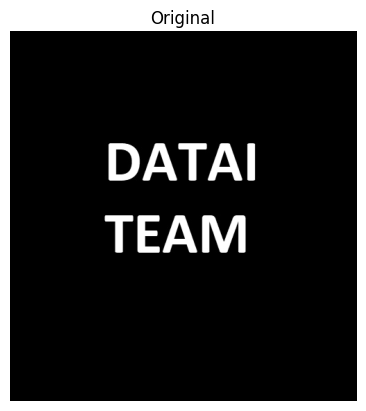

In [2]:
img = cv2.imread("datai_team.jpg", 0)
plt.figure(), plt.imshow(img, cmap="gray"), plt.axis("off"), plt.title("Original")

### Erezyon 
- Ön plandaki nesnenin sınırlarını aşındırır.

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 499.5, 533.5, -0.5),
 Text(0.5, 1.0, 'Eroded Image'))

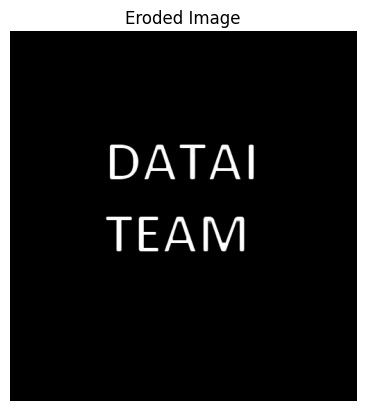

In [3]:
# Erosion
kernel = np.ones((5, 5), np.uint8)
#iteration erode uygulama sayısı
result = cv2.erode(img, kernel, iterations=1) 
plt.figure(), plt.imshow(result, cmap="gray"), plt.axis("off"), plt.title("Eroded Image")

### Genişleme 
- Erezyonun tam tersidir.
- Görüntüdeki beyaz bölgeyi arttırır.

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 499.5, 533.5, -0.5),
 Text(0.5, 1.0, 'Dilation Image'))

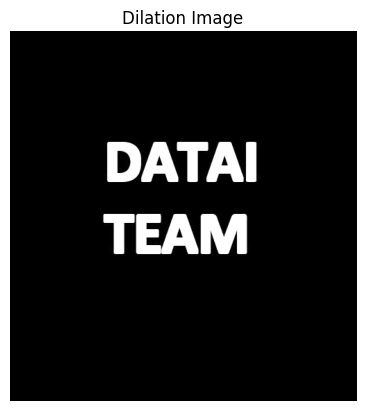

In [5]:
# genişleme dilation 
result2= cv2.dilate(img, kernel, iterations=1)
plt.figure(), plt.imshow(result2, cmap= "gray"), plt.axis("off"), plt.title("Dilation Image")

### White Noise 


(<Figure size 640x480 with 1 Axes>,
 (-0.5, 499.5, 533.5, -0.5),
 Text(0.5, 1.0, 'white noise on image'))

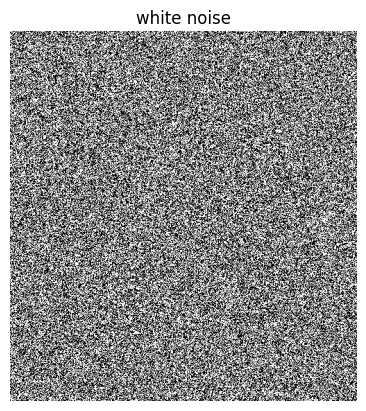

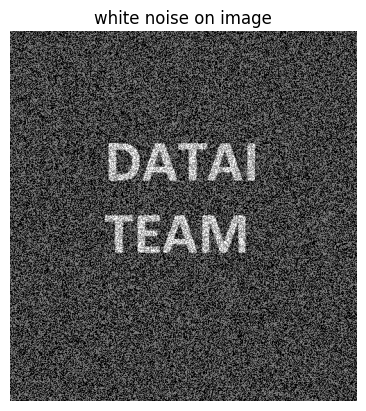

In [6]:
# white noise 
whiteNoise = np.random.randint(0,2, size=img.shape[:2]) #ch dahil etmedik
whiteNoise = whiteNoise*255 #normalize ettik 0-255 sklasına çıkarttık
plt.figure(), plt.imshow(whiteNoise, cmap= "gray"), plt.axis("off"), plt.title("white noise")

noise_img = whiteNoise + img 
plt.figure(), plt.imshow(noise_img, cmap= "gray"), plt.axis("off"), plt.title("white noise on image")

### Black Noise 

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 499.5, 533.5, -0.5),
 Text(0.5, 1.0, 'black noise on image'))

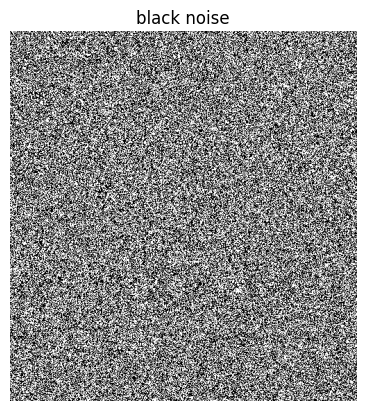

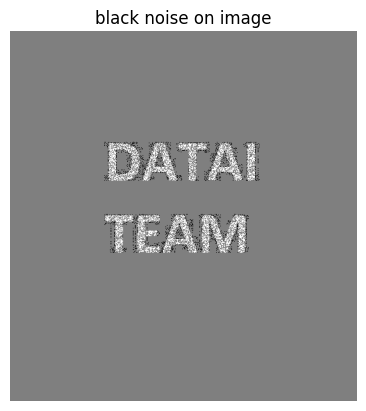

In [7]:
#black noise 
blackNoise = np.random.randint(0,2, size=img.shape[:2]) #ch dahil etmedik
blackNoise = blackNoise*-255 #normalize ettik 0-255 sklasına çıkarttık
plt.figure(), plt.imshow(blackNoise, cmap= "gray"), plt.axis("off"), plt.title("black noise")

bnoise_img = blackNoise + img 
bnoise_img[bnoise_img <= -255] = 0 
plt.figure(), plt.imshow(bnoise_img, cmap= "gray"), plt.axis("off"), plt.title("black noise on image")

### Açılma - Opening 
- Erezyon + Genişleme 
- Gürültünün giderilmesinde faydalıdır

White noise eklediğimiz görüntü üzerinde opening işlemi uygulayarak, gürültüyü temzileyelim 

(-0.5, 499.5, 533.5, -0.5)

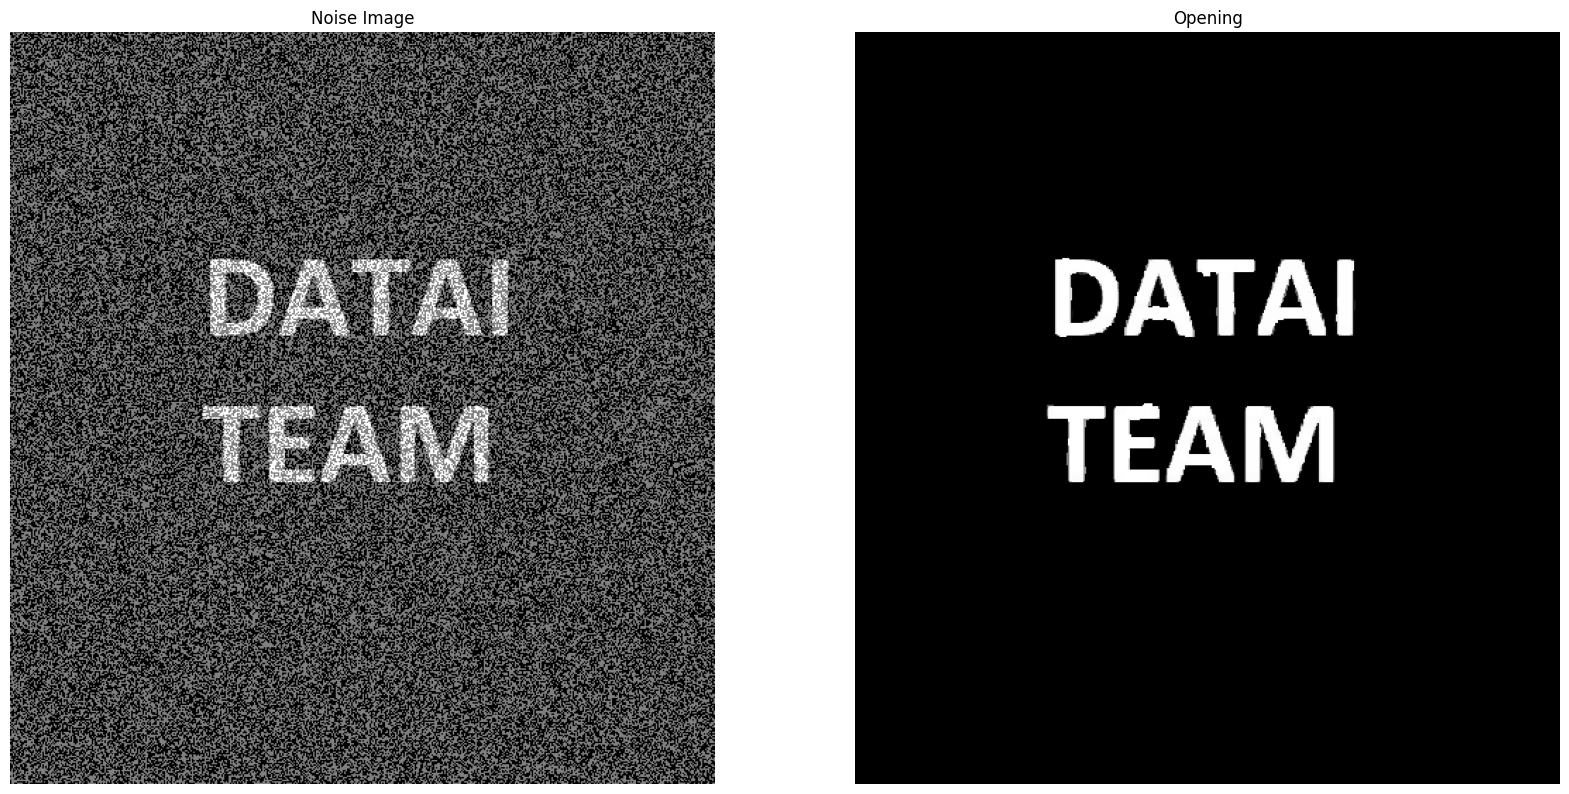

In [9]:
# açılma opening 
opening = cv2.morphologyEx(noise_img.astype(np.float32), cv2.MORPH_OPEN, kernel)

fig = plt.figure(figsize=(20, 10))
first_plot = fig.add_subplot(1, 2, 1)
first_plot.imshow(noise_img, cmap="gray")
first_plot.set_title("Noise Image")
first_plot.axis("off")

second_plot = fig.add_subplot(1, 2, 2)
second_plot.imshow(opening, cmap="gray")
second_plot.set_title("Opening")
second_plot.axis("off")

### Close - Kapatma 
- Açmanın tam tersidir
- Genişleme + erozyon 
- Ön plandaki nesnelerin içindeki küçük delikleri veya nesne üzerindeki küçük siyah noktaları kapatmak için kullanışlıdır

Black noise uyguladığımız resmin üzerinde closing işlemi uygulayarak, etkisini gözlemleyelim

(-0.5, 499.5, 533.5, -0.5)

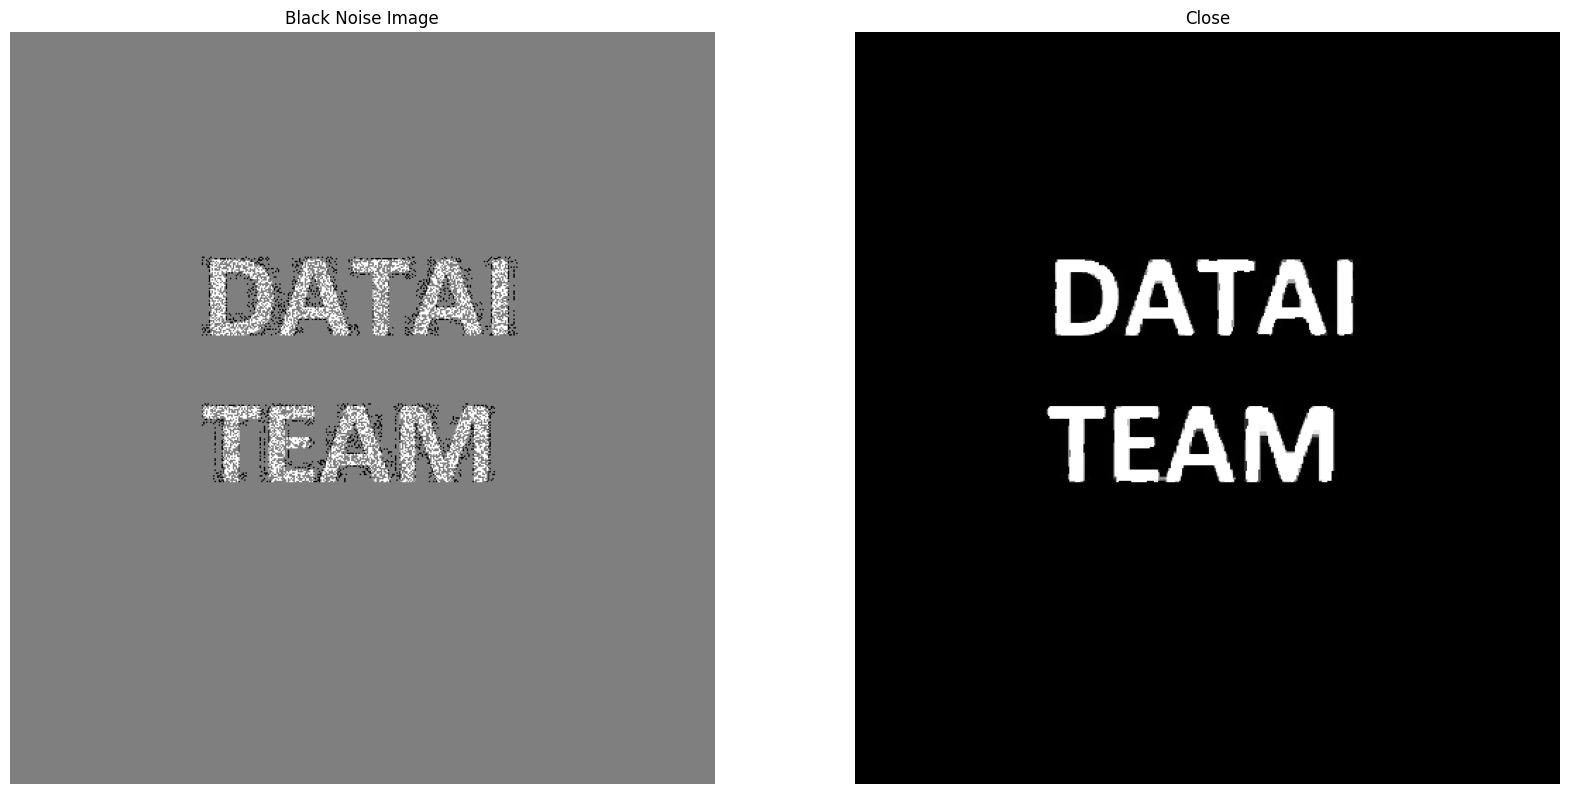

In [10]:
#close kapatma 
close = cv2.morphologyEx(bnoise_img.astype(np.float32), cv2.MORPH_CLOSE, kernel)

fig = plt.figure(figsize=(20, 10))
first_plot = fig.add_subplot(1, 2, 1)
first_plot.imshow(bnoise_img, cmap="gray")
first_plot.set_title("Black Noise Image")
first_plot.axis("off")

second_plot = fig.add_subplot(1, 2, 2)
second_plot.imshow(close, cmap="gray")
second_plot.set_title("Close")
second_plot.axis("off")

### Morfolojik Gradyan 
- Bir görüntünün genişlemesi ve erezyonu arasındaki farktır

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 499.5, 533.5, -0.5),
 Text(0.5, 1.0, 'gradient image'))

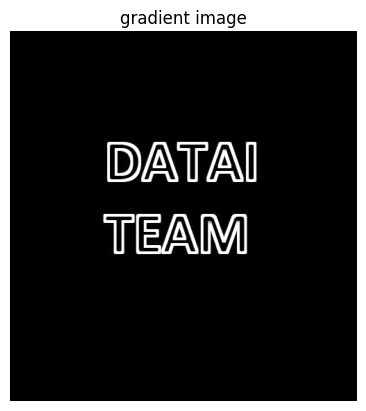

In [11]:
#gradient kenar tespitinin en temel noktalarından biri 
gradient = cv2.morphologyEx( img, cv2.MORPH_GRADIENT, kernel)
plt.figure(), plt.imshow(gradient, cmap= "gray"), plt.axis("off"), plt.title("gradient image")